YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.9/107.7 GB disk)
detect: weights=['yolov5s.pt'], source=image.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CPU

100% 14.1M/14.1M [00:00<00:00, 228MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/image.jpg: 448x640 1 person, 1 giraffe, 262.8ms
Speed: 4.2ms pre-process, 262.8ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


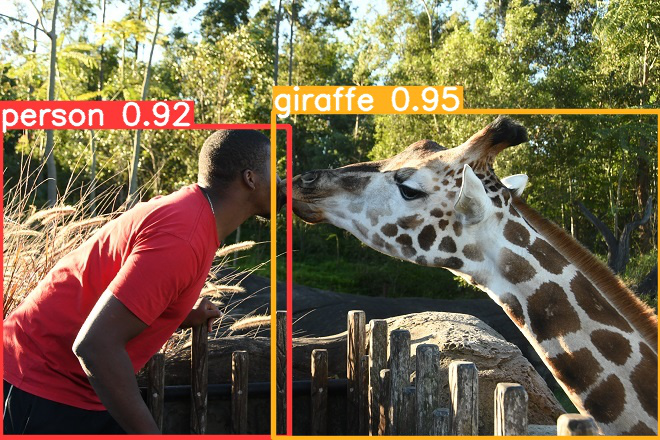

In [25]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import urllib.request
import torch
import utils
from PIL import Image

display = utils.notebook_init()  # checks

# Pobranie obrazu
url = "https://aws3-azuploads-01.s3.amazonaws.com/uploads/2018/11/Giant_Giraffe_Snapshot.jpg"
urllib.request.urlretrieve(url, "image.jpg")

# Wykonanie rozpoznawania obrazu
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source image.jpg

# Wyświetlenie obrazu
image_path = "runs/detect/exp/image.jpg"
image = Image.open(image_path)
image.show()


In [26]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:06<00:00, 133MB/s] 


In [27]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

val: data=/content/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning /content/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/datasets/coco/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:02<00:00, 2120.06it/s]
val: New cache created: /content/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/datasets/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/157 [00:00<?, ?it/s]
Traceback (most recent call la

In [28]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.

In [29]:
#  PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-187-g0004c74 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 720x1280 2 persons, 2 ties
Speed: 208.1ms pre-process, 169.7ms inference, 0.7ms NMS per image at shape (1, 3, 384, 640)
